In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_regression, make_classification
from sklearn.utils import shuffle

# Linear Regression

In [ ]:
### Create a regression dataset
n_f = 1
n_t = 1
n_s = 1000
X, y = make_regression(n_samples=n_s,
                       n_features=n_f,
                       n_targets=n_t,
                       noise=2,
                       random_state=42)

df = pd.DataFrame(np.concatenate([X, y[..., np.newaxis]], axis=1),
                  columns = ['X', 'y'])
df.head()

,X,y
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


**<font color='blue'> 1. Display the scatter plot of X and y using matplotlib.**

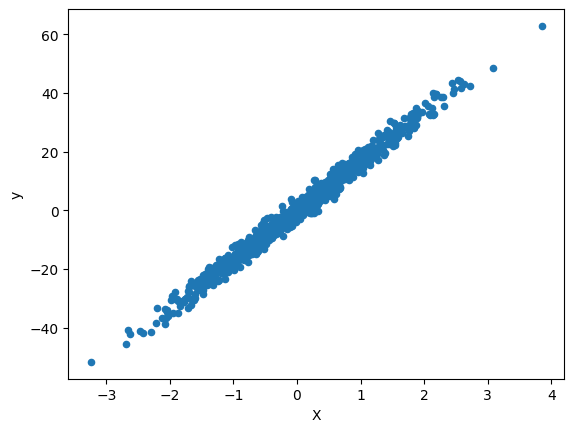

In [ ]:
df.plot.scatter(x="X", y="y")
plt.show()

In order to compute the gradient descent method we need to choose:


*   A method to predict the values
*   A cost function to estimate the errors made by the prediction



The method used to predict the values is the **linear regression**. <br>
For a univariate function, it can be expressed using the following formula:<br><br>

<font size="+1"><center>$y_{pred} = \theta_1x +\theta_0$</center><br>

The **cost function** used in this example is the **mean squared error**. <br>
It is a convex, defined and derivable function which is perfect for the Gradient Descent method.<br>
It can be expressed using the following formula:<br><br>

<font size="+1"><center>$mse = J(\theta) = \frac {1}{m} \sum_{i=1}^{m}(y_{pred,i}-y_{true,i})^2$</center><br>

We can inject the linear regression into the cost function in order to get:<br><br>

<font size="+1"><center>$J(\theta)=\frac {1}{m} \sum_{i=1}^{m}((\theta_1 x_{i} + \theta_0) - y_{true,i})^2$</center><br>

with $m$ the number of instances in the dataset, <br> $\theta_{0}$ and $\theta_{1}$ the parameter of the model, <br>$y_{i}$ the label of the i-th instance, <br> $x_{i}$ the feature value of the i-th instance.<br><br>

Thus, the **gradient vector** for this example is the following (it is the partial derivatives regarding $\theta_0$ and $\theta_1$):<br><br>
<font size="+1"><center>$\bigtriangledown J(\theta)=\begin{bmatrix}
\frac{\partial J(\theta)}{\partial\theta_0}\\
\frac{\partial J(\theta)}{\partial\theta_1}
\end{bmatrix}$</center><br>

<font size="+1"><center>$\bigtriangledown J(\theta)=\begin{bmatrix}
\frac {2}{m} \sum_{i=1}^{m}\theta_1 x_{i}+\theta_0 - y_{i}\\
\frac {2}{m} \sum_{i=1}^{m}x_{i} (\theta_1 x_{i}+\theta_0 - y_{i})
\end{bmatrix}$</center><br>

Now, we can use the Gradient Descent Algorithm to iteratively update a weight  using the following formula:<br><br>

<font size="+1"><center>$\theta_{n+1} = \theta_{n} - \eta * \frac{\partial J(\theta)}{\partial\theta_{n}}$</center><br>

And especially:<br><br>

<font size="+1"><center>$\theta_{1, n+1} = \theta_{1,n} - \eta \frac {2}{m} \sum_{i=1}^{m}x_{i}(\theta_{1,n} x_{i}+\theta_{0,n} - y_{i})$</center>
<font size="+1"><center>$\theta_{0, n+1} = \theta_{0,n} - \eta \frac {2}{m} \sum_{i=1}^{m}(\theta_{1,n} x_{i}+\theta_{0,n} - y_{i})$</center><br>

with $n$ the n-th step of the Gradient Descent algorithm,
<br>$\eta$ the learning rate.

**<font color = "blue">2.a. Initialize the parameters of the model to 0.
<br> 2.b. Create a function named predict that takes the feature and the parameters as inputs, and calculates the predicted output using the linear equation W * X + b.
<br>2.c. Create a function named mean_squared_error that takes the label and the predicted output, and calculates the mean squared error.**

In [ ]:
W = 0
b = 0

def predict(X, W, b):
    return X * W + b

def mean_squared_error(y, y_pred):
    sq_error = (y_pred - y)**2
    return np.mean(sq_error)

**<font color = "blue">3. Create a function named update_weights that takes the feature, the label, the predicted value, the parameters (W and b) and the learning rate. The function should compute the gradient with respect to the parameters W and b. It should update the parameters using the computed gradient and the learning rate and return them.**

In [ ]:
def update_weights(X, y, y_pred, W, b, lr):

    d_w = 2 * np.mean(X * (y_pred - y))  # 2 * X * ((ax + b) - y)
    W -= lr * d_w                        # w = w - n*grad
    d_b = 2 * np.mean(y_pred - y)        # 2 * ((ax + b) - y)
    b -= lr * d_b                        # b = b - n*grad

    return W, b

**<font color = "blue">4. Create a function named main that runs the Gradient Descent and save the steps using the previous functions.
<br>a. The function should take the parameters X, y, W, b, lr, eps, and max_iter. <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;eps is a small threshold value to check for convergence (1e-5).<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;max_iter is the maximum number of iterations.
<br>b. Initialize lists to keep track of the history of weights, biases, and cost values throughout the iterations.
<br>c. At each step of the algorithm, predict the values, update the parameters and save their values as well as the one of the objective function.
<br>d. The algorithm should stop when the change in cost between iterations is less than eps or until max_iter is reached.
<br>e. Return the history lists.**

In [ ]:
def main(X, y, W, b, lr, eps = 1e-5, max_iter = 1000):
    weight_history = [W]
    bias_history = [b]
    cost_history = [np.inf]

    for iter in range(1, max_iter+1):

        # Update of the weights
        y_pred = predict(X, W, b)
        W, b = update_weights(X, y, y_pred, W, b, lr)

        # Saving the results of the current step
        cost = mean_squared_error(y, y_pred)
        weight_history.append(W)
        bias_history.append(b)
        cost_history.append(cost)

        if iter%50 == 0 :
            print(f"iter : {iter:+4}    W : {W:+8.3f}     bias : {b:+8.4f}    cost : {cost:.5}")

        if abs(cost_history[iter] - cost_history[iter-1]) < eps :
            break

    return {"weights": weight_history, "bias": bias_history, "cost": cost_history}

**<font color="blue">5.a. Display the parameter values and the errors at each step.
<br>5.b. Display the error values at each step on a graph.**

iter :  +50    W :  +10.369     bias :  +0.1285    cost : 44.155
iter : +100    W :  +14.308     bias :  +0.0992    cost : 9.7388
iter : +150    W :  +15.806     bias :  +0.0596    cost : 4.7632
iter : +200    W :  +16.376     bias :  +0.0342    cost : 4.0429
iter : +250    W :  +16.592     bias :  +0.0208    cost : 3.9385
iter : +300    W :  +16.675     bias :  +0.0143    cost : 3.9233
iter : +350    W :  +16.706     bias :  +0.0113    cost : 3.9211


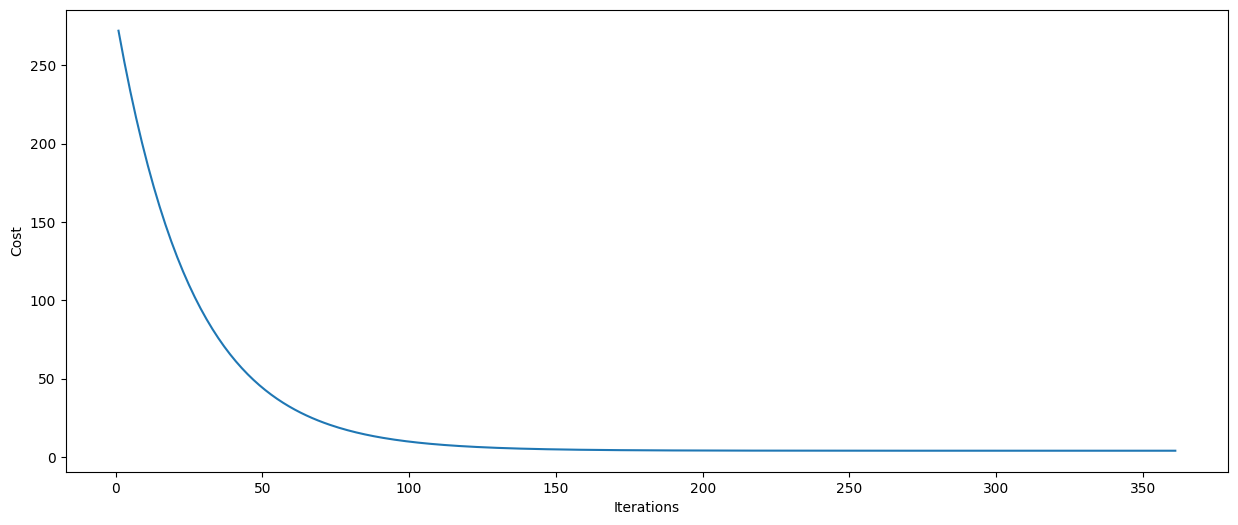

In [ ]:
history = main(X.flatten(), y, W, b, lr=1e-2)

fig, ax = plt.subplots(figsize=(15,6))
ax.plot(np.arange(len(history['cost'])),
         history['cost'])
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
plt.show()

**<font color = "blue">6. Display the linear regression on the scatter plot.**

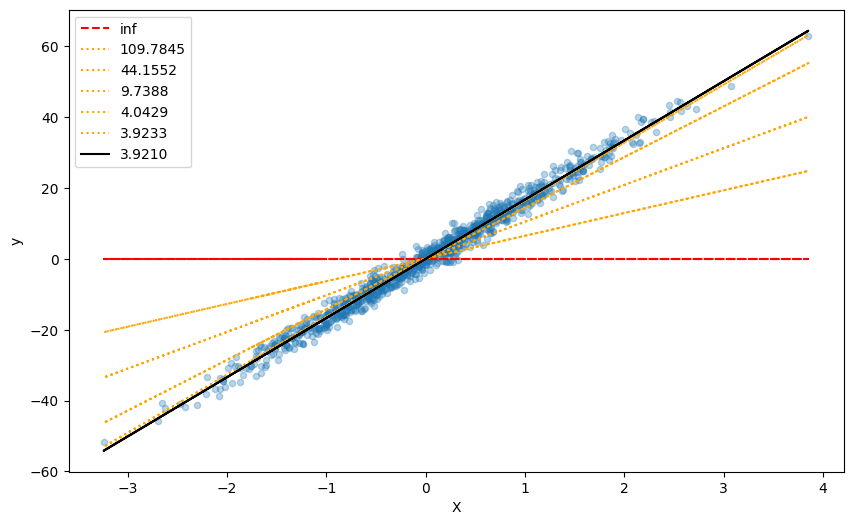

In [ ]:
y_pred_0 = history["weights"][0]*X + history["bias"][0]
y_pred_1 = history["weights"][25]*X + history["bias"][25]
y_pred_2 = history["weights"][50]*X + history["bias"][50]
y_pred_3 = history["weights"][100]*X + history["bias"][100]
y_pred_4 = history["weights"][200]*X + history["bias"][200]
y_pred_5 = history["weights"][300]*X + history["bias"][300]
y_pred_n = history["weights"][-1]*X + history["bias"][-1]

cost_0 = history["cost"][0]
cost_1 = history["cost"][25]
cost_2 = history["cost"][50]
cost_3 = history["cost"][100]
cost_4 = history["cost"][200]
cost_5 = history["cost"][300]
cost_n = history["cost"][-1]

fig, ax = plt.subplots(figsize=(10,6))

df.plot.scatter(x="X", y="y", ax=ax, alpha=0.3)

ax.plot(X, y_pred_0, c="red", linestyle = "--", label = f"{cost_0:.4f}")
ax.plot(X, y_pred_1, c="orange", linestyle = ":", label = f"{cost_1:.4f}")
ax.plot(X, y_pred_2, c="orange", linestyle = ":", label = f"{cost_2:.4f}")
ax.plot(X, y_pred_3, c="orange", linestyle = ":", label = f"{cost_3:.4f}")
ax.plot(X, y_pred_4, c="orange", linestyle = ":", label = f"{cost_4:.4f}")
ax.plot(X, y_pred_5, c="orange", linestyle = ":", label = f"{cost_5:.4f}")

ax.plot(X, y_pred_n, c="black", label = f"{cost_n:.4f}")

plt.legend()
plt.show()

# Multivariate Linear Regression

In [ ]:
n_f = 5
n_t = 1
n_s = 1000
X, y = make_regression(n_samples=n_s,
                       n_features=n_f,
                       n_targets=n_t,
                       noise=0.5,
                       random_state=42)

df = pd.DataFrame(np.concatenate([X, y[...,np.newaxis]], axis=1),
                  columns = [f'X_{i}' for i in range(1,n_f+1)]+['y'])
df.head()

,X_1,X_2,X_3,X_4,X_5,y
0,2.056544,0.606851,0.482688,-1.130888,0.420094,74.738571
1,-0.799192,-0.645964,-0.182896,-0.482744,1.374876,-42.051796
2,1.076007,-0.796026,-0.751969,0.021312,-0.319054,-24.700748
3,-0.103255,-0.828497,1.489863,-1.643189,-1.600904,-86.950690
4,-2.063403,0.503252,-0.645572,-0.317350,-1.661083,-86.012064


Here is a **multivariate Linear Regression** with 5 features:

<font size="+1"><center>$\begin{align*}y_{pred} &= \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \theta_4x_4 + \theta_5x_5 + \theta_0\\
&= X \cdot \Theta^T+\theta_0
\end{align*}$</center><br>

with $\Theta^T \cdot X$ the dot product of the following matrices:

<font size="+1"><center>$\begin{align*}
\Theta^T &= \begin{bmatrix} \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_4\\ \theta_5 \\
\end{bmatrix}\\
X &= \begin{bmatrix}x_{0,1} & x_{0,2} & x_{0,3} & x_{0,4} & x_{0,5}\\
x_{1,1} & x_{1,2} & x_{1,3} & x_{1,4} & x_{1,5}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
x_{m,1} & x_{m,2} & x_{m,3} & x_{m,4} & x_{m,5}\\
\end{bmatrix}
\end{align*}$</center><br>

The Gradient Descent for a multivariate linear regression is very similar to the one with a univariate linear regression.<br> The Gradient vector have more elements:<br><br>

<font size="+1"><center>$\bigtriangledown J(\Theta)=\begin{bmatrix}
\frac{\partial J(\theta)}{\partial\theta_0}\\
\frac{\partial J(\theta)}{\partial\theta_1}\\
\vdots\\
\frac{\partial J(\theta)}{\partial\theta_5}
\end{bmatrix}$</center><br>

<font size="+1"><center>$\bigtriangledown J(\Theta)=\begin{bmatrix}
\frac {2}{m} \sum_{i=1}^{m}\Theta^T \cdot X_i + \theta_0 - y^{(i)}\\
\frac {2}{m} \sum_{i=1}^{m}\color{red}{x_{i,1}} (\Theta^T \cdot X_i+\theta_0 - y^{(i)})\\
\vdots\\
\frac {2}{m} \sum_{i=1}^{m}\color{red}{x_{i,5}} (\Theta^T \cdot X_i+\theta_0 - y^{(i)})
\end{bmatrix}$</center><br>


**<font color="blue"> 1.a. Initialize the parameters of the model to 0.**

*Tips: Create a numpy array W that contains all the parameters of the features.<br> The shape of W should be (5,)*

In [ ]:
W = np.zeros(X.shape[1])
b = 0

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"W shape: {W.shape}")

X shape: (1000, 5)
y shape: (1000,)
W shape: (5,)


**<font color="blue"> 2.a. Re-create the predict function for the multivariate linear regression.
<br>2.b. Check the shape of the prediction, it should be (1000,).**

*Tips: You should normally be able to reuse the mean_squared_error function from the univariate function.*

In [ ]:
def predict(X, W, b):
    return np.dot(X, W) + b

def mean_squared_error(y, y_pred):
    sq_error = (y_pred - y)**2
    return np.mean(sq_error)

In [ ]:
y_pred = predict(X, W, b)
y_pred.shape

(1000,)

**<font color="blue"> 3.a. Re-create the update_weight function for the multivariate linear regression.
<br>3.b. Check the shape of the parameters. It should still be (5,) and (1,)**

*Tips: Be careful of the shapes of X (1000, 5) and the error measurement (1000,).<br> There is one error per instance of the dataset (i.e. per line) but there are 5 features.<br> Each feature have to be multipied by the error.*

In [ ]:
def update_weights(X, y, y_pred, W, b, lr):

    d_w = 2 * np.dot(X.T, (y_pred - y)) / X.shape[0]
    d_b = 2 * np.mean(y_pred - y)

    W -= lr * d_w
    b -= lr * d_b

    return W, b

In [ ]:
W, b = update_weights(X, y, y_pred, W, b, lr=1.e-2)
print(f"W values: {W} - W shape: {W.shape}")
print(f"b value : {b}")

W values: [0.50602337 0.94595749 0.38420133 0.48422725 0.37819593] - W shape: (5,)
b value : 0.017446227239531292


**<font color="blue">4.a. Re-create the main function for the multivariate linear regression.<br>4.b. Display the parameters values and the errors at each step.**

In [ ]:
def main(X, y, W, b, lr, eps = 1e-5, max_iter = 1000):
    weight_history = [W.tolist()]
    bias_history = [b]
    cost_history = [np.inf]

    iter = 0
    while iter != max_iter:
        y_pred = predict(X, W, b)

        W, b = update_weights(X, y, y_pred, W, b, lr)
        weight_history.append([W.tolist()])
        bias_history.append(b)

        cost = mean_squared_error(y, y_pred)
        cost_history.append(cost)

        if iter%20 == 0 :
            w_values = " ".join([f"w{i+1}({w:+7.3f})" for i, w in enumerate(W)])
            print(f"iter : {iter:+4}     W : {w_values}     bias : {b:+7.4f}     cost : {cost:.5}")

        if abs(cost_history[iter] - cost_history[iter-1]) < eps :
            break

        iter+=1

    return {"weights": weight_history, "bias": bias_history, "cost": cost_history}

iter :   +0     W : w1( +1.003) w2( +1.872) w3( +0.760) w4( +0.959) w5( +0.749)     bias : +0.0342     cost : 4018.0
iter :  +20     W : w1( +9.297) w2(+16.874) w3( +6.717) w4( +8.718) w5( +6.793)     bias : +0.2507     cost : 1791.4
iter :  +40     W : w1(+15.107) w2(+26.774) w3(+10.482) w4(+13.937) w5(+10.837)     bias : +0.3183     cost : 801.19
iter :  +60     W : w1(+19.174) w2(+33.310) w3(+12.855) w4(+17.450) w5(+13.542)     bias : +0.3115     cost : 359.51
iter :  +80     W : w1(+22.019) w2(+37.628) w3(+14.348) w4(+19.817) w5(+15.352)     bias : +0.2718     cost : 161.9
iter : +100     W : w1(+24.008) w2(+40.481) w3(+15.284) w4(+21.413) w5(+16.563)     bias : +0.2215     cost : 73.218
iter : +120     W : w1(+25.398) w2(+42.367) w3(+15.869) w4(+22.489) w5(+17.373)     bias : +0.1718     cost : 33.294
iter : +140     W : w1(+26.367) w2(+43.615) w3(+16.233) w4(+23.216) w5(+17.915)     bias : +0.1277     cost : 15.265
iter : +160     W : w1(+27.044) w2(+44.441) w3(+16.459) w4(+23.70

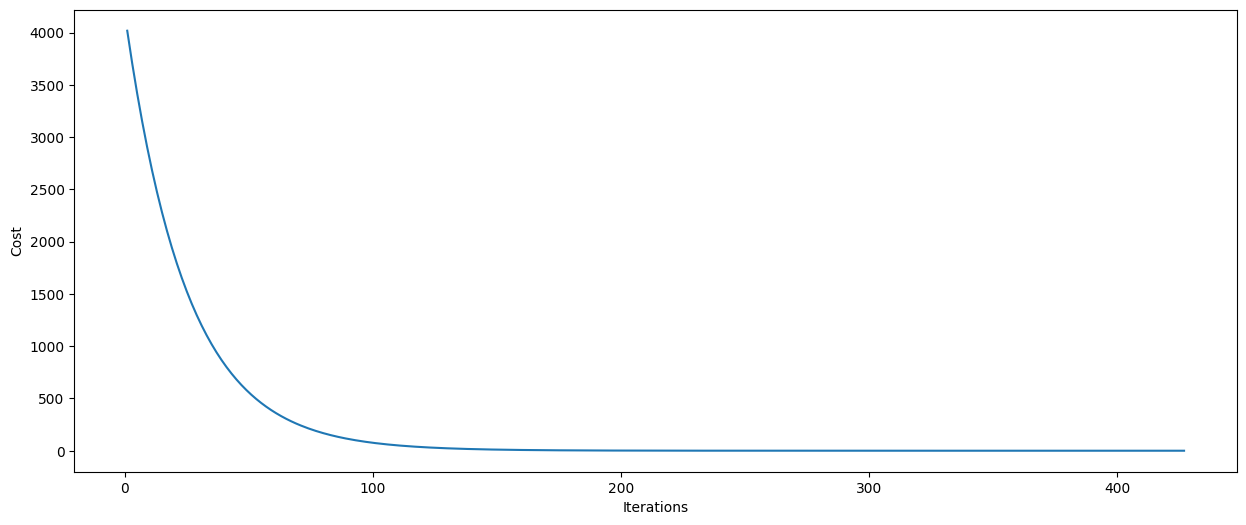

In [ ]:
history = main(X, y, W, b, lr=1e-2)

plt.figure(figsize=(15,6))
plt.plot(np.arange(len(history['cost'])),
         history['cost'])
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

# Logistic Regression

In [ ]:
n_f = 2
n_t = 2
n_s = 1000
X, y = make_classification(n_samples=n_s,
                           n_features=n_f,
                           n_redundant=0,
                           n_informative=2,
                           n_clusters_per_class=1,
                           n_classes=n_t,
                           random_state=4)

df = pd.DataFrame(np.concatenate([X,y[...,np.newaxis]], axis=1),
                  columns = [f'X_{i+1}' for i in range(n_f)]+['y'])
df.head()

,X_1,X_2,y
0,1.225160,-0.951731,1.0
1,1.016304,-1.725175,1.0
2,0.335340,-1.724896,1.0
3,1.786348,-1.782653,1.0
4,1.016751,1.062569,1.0


The method used to predict the values is the **Logistic regression**.<br>
For a multivariate function, it can be expressed using the following formula:<br><br>

<font size="+1"><center>$h_\theta(z) = \frac{1}{1+exp(-z)}$</center><br>
<center>with <font size="+1">$\begin{align*}z &= \theta_{1}x_{1} + ...+ \theta_{n}x_{n} + \theta_{0}\\ &= \Theta^T \cdot X + \theta_0 \end{align*}$</center>

This time we cannot use the MSE because the sigmoid transform is non-linear.<br> Squaring this prediction as we do in MSE results in a non-convex function with many local minimums.<br> Instead, we can use the **Log Loss** (or **cross-entropy**).<br>
It can be expressed using the following formula:<br><br>

<font size="+1"><center>$J(h_\theta(z)) = -\frac{1}{m}\sum_{i=1}^{m}y_{i}\log(h_\theta(z_i))+(1-y_{i})\log(1-h_\theta(z_i))$</center><br>

with $m$ the first dimension of the data i.e. the number of instances, <br>$y_{i}$ the label of the example $i$ (0 or 1), <br>$h_\theta$ the logistic function. <br>

Uising the chain rule, the partial derivatives for every theta is:<br><br>

<font size="+2"><center>$\frac{\partial J(h_\theta(z_i))}{\partial \theta_k}=\frac{\partial J(h_\theta(z_i))}{\partial h_\theta(z_i)}\frac{\partial h_\theta(z_i)}{\partial z_i}\frac{\partial z_i}{\partial \theta_k}$</center><br>

<font size="+2"><center>$\frac{\partial J(h_\theta(z_i))}{\partial h_\theta(z_i)} = -\frac{y_i}{h_\theta(z_i)} + \frac{1-y_i}{1-h_\theta(z_i)}$</center>

<font size="+2"><center>$\frac{\partial h_\theta(z_i)}{\partial z_i} = h_\theta \left(z_i \right)\left(1-h_\theta \left(z_i\right)\right)$</center>

<font size="+2"><center>$\frac{\partial z_i}{\partial \theta_k} = x_{i,k}$</center><br>

Thus, the partial derivatives relative to the parameters of the logistic regression are:<br><br>

<font size="+1"><center>$\begin{align*}
\frac{\partial J(h_\theta(z))}{\partial \theta_k} &= \frac{1}{m}\sum_{i=1}^{m} \left(-\frac{y_i}{h_\theta(z_i)} + \frac{1-y_i}{1-h_\theta(z_i)}\right) h_\theta(z_i)(1-h_\theta(z_i))x_{i,k}\\
&=\frac{1}{m}\sum_{i=1}^{m}x_{i,k}(h_\theta(z_i)-y_{i}) \\
\end{align*}$</center><br>

The gradient vector of the logistic regression is:<br><br>

<font size="+1"><center>$\bigtriangledown J(\Theta)=\begin{bmatrix}
\frac{1}{m}\sum_{i=1}^{m}(h_\theta(z_i)-y_{i})\\
\frac{1}{m}\sum_{i=1}^{m}\color{red}{x_{i,1}}(h_\theta(z_i)-y_{i})\\
\vdots\\
\frac{1}{m}\sum_{i=1}^{m}\color{red}{x_{i,n}}(h_\theta(z_i)-y_{i})
\end{bmatrix}$</center><br>


Now, we can use the Gradient Descent algorithm to update the weight iteratively using the following formula:<br><br>

<font size="+1"><center>$\theta_{n+1} = \theta_n - \eta * \frac{\partial J(\theta)}{\partial\theta_n}$</center><br>

<font size="+1"><center>$\begin{align*}
\theta_{k,n+1} &= \theta_{k,n}-\eta \frac{1}{m}\sum_{i=1}^{m}x_{i,k}(h_\theta(z_i)-y_{i})\\
\theta_{0,n+1} &= \theta_{0,n}-\eta \frac{1}{m}\sum_{i=1}^{m}(h_\theta(z_i)-y_{i})
\end{align*}$</center>

with $\eta$ the learning rate,
<br>$\theta_{k,n+1}$ the parameters,
<br>$\theta_{0,n+1}$ the bias,
<br>$h_\theta(z_i)$ the logistic function - i.e. the prediction,
<br>$y_i$ the label.

**<font color='blue'> 1. Display the scatter plot of the two features and color the dots based on their label using matplotlib.**

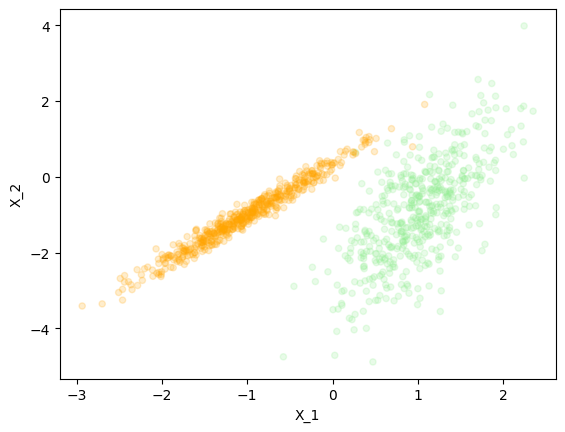

In [ ]:
df.plot.scatter(x="X_1",y="X_2", c=["orange" if el == 0.0 else "lightgreen" for el in y], alpha=0.2)
plt.show()

**<font color='blue'> 2. Create a function that computes the prediction and another one that computes the cross-entropy value.**

In [ ]:
def sigmoid(z):
        return 1.0 / (1 + np.exp(-z))

def predict(X, W, b):
    return sigmoid(np.dot(X, W) + b)

def cross_entropy(y, y_pred):
    cost = -y*np.log(y_pred) - (1-y)*np.log(1-y_pred)
    return np.mean(cost)

**<font color='blue'> 3. Create an update_weights function based on the Logistic Regression gradient vector.**

*Tips: It's very similar to the Linear Regression.*

In [ ]:
def update_weights(X, y, y_pred, W, b, lr):

    d_w = np.dot(X.T, (y_pred - y)) / X.shape[0]
    d_b = np.mean(y_pred - y)

    W -= lr * d_w
    b -= lr * d_b

    return W, b

**<font color='blue'> 4. Create a main function that runs the Gradient Descent algorithm for the Logistic Regression model.**

*Tips: Again, it should be very similar - if not identical - to the multivariate linear regression.*

In [ ]:
def main(X, y, W, b, lr, eps = 1e-5, max_iter = 5000):
    weight_history = [W.tolist()]
    bias_history = [b]
    cost_history = [np.inf]

    iter = 0
    while iter != max_iter:
        y_pred = predict(X, W, b)

        W, b = update_weights(X, y, y_pred, W, b, lr)
        weight_history.append([W.tolist()])
        bias_history.append(b)

        cost = cross_entropy(y, y_pred)
        cost_history.append(cost)

        if iter%100 == 0 :
            w_values = " ".join([f"w{i+1}({w:+7.3f})" for i, w in enumerate(W)])
            print(f"iter : {iter:+4}     W : {w_values}     bias : {b:+7.4f}     cost : {cost:.5}")

        if abs(cost_history[iter] - cost_history[iter-1]) < eps :
            break

        iter+=1

    return {"weights": weight_history, "bias": bias_history, "cost": cost_history}

**<font color="blue">5.a. Display the parameter values and the errors at each step.
<br>5.b. Display the error values at each step on a graph.**

iter :   +0     W : w1( -1.004) w2( +0.883)     bias : +0.1140     cost : 1.3827
iter : +100     W : w1( -0.399) w2( +0.686)     bias : +0.2274     cost : 0.96158
iter : +200     W : w1( +0.078) w2( +0.498)     bias : +0.2957     cost : 0.6922
iter : +300     W : w1( +0.448) w2( +0.348)     bias : +0.3182     cost : 0.53012
iter : +400     W : w1( +0.742) w2( +0.234)     bias : +0.3098     cost : 0.43008
iter : +500     W : w1( +0.981) w2( +0.144)     bias : +0.2845     cost : 0.3639
iter : +600     W : w1( +1.181) w2( +0.070)     bias : +0.2505     cost : 0.3171
iter : +700     W : w1( +1.352) w2( +0.007)     bias : +0.2124     cost : 0.28218
iter : +800     W : w1( +1.501) w2( -0.050)     bias : +0.1726     cost : 0.25505
iter : +900     W : w1( +1.633) w2( -0.101)     bias : +0.1325     cost : 0.2333
iter : +1000     W : w1( +1.752) w2( -0.148)     bias : +0.0928     cost : 0.21543
iter : +1100     W : w1( +1.859) w2( -0.191)     bias : +0.0539     cost : 0.20045
iter : +1200     W 

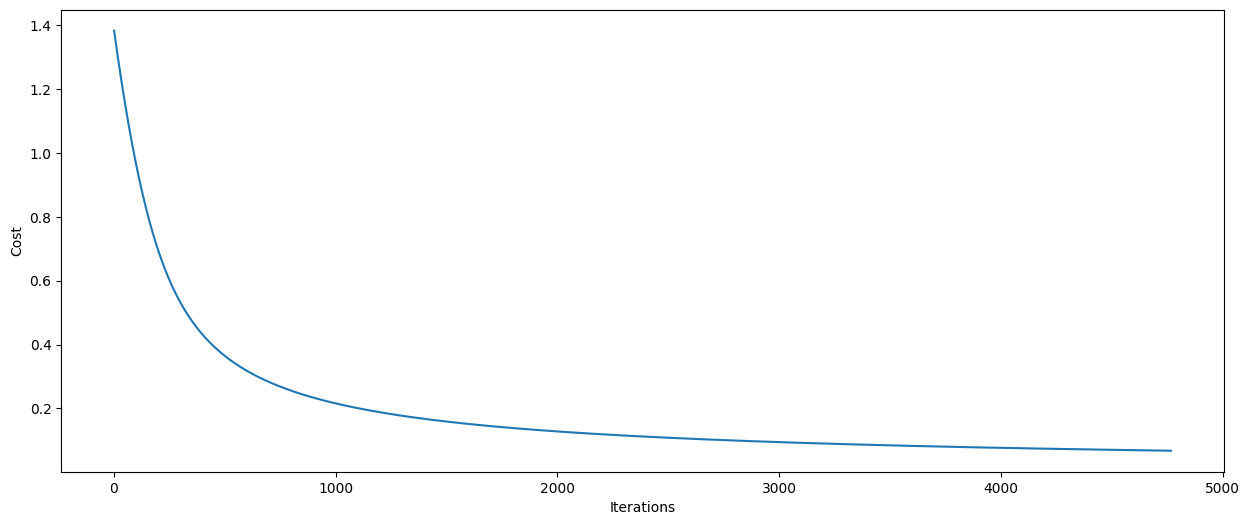

In [ ]:
W = np.random.randn(X.shape[1])
b = np.random.rand()

history = main(X, y, W, b, lr=1e-2)

plt.figure(figsize=(15,6))
plt.plot(np.arange(len(history['cost'])),
         history['cost'])
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

**<font color="blue">6. Compute the accuracy score of the model using its prediction.**

*Tips: The logistic regression returns a continuous value between 0 and 1 that should be converted into a discrete value, 0 or 1.<br> You can set all the value higher than 0.5 to 1 and the others to 0.*

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = predict(X, history["weights"][-1][-1], history["bias"][-1])
y_pred = list(map(lambda x: 1 if x>0.5 else 0, y_pred))
print(f"Final accuracy: {accuracy_score(y, y_pred):.2%}")

Final accuracy: 99.50%


**<font color="blue">7. Draw the prediction boundary on the graph created at Q1.<br> It's the line where the predictions are 0 on its left and 1 on its right.**

*Tips: This boundary is typically where the linear combination of features and weights equals zero, i.e., $0 = \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{0}$.<br> You can generate random values for $x_1$ and compute the $x_2$ values using the aforementionned formula.*

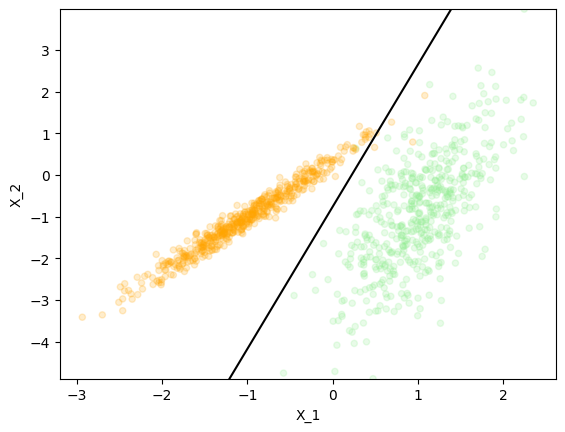

In [ ]:
df.plot.scatter(x="X_1",y="X_2", c=["orange" if el == 0.0 else "lightgreen" for el in y], alpha=0.2)

x1_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
x2_values = -(history["weights"][-1][0][0] * x1_values + history["bias"][-1]) / history["weights"][-1][0][-1]

plt.plot(x1_values, x2_values, c="black")

plt.ylim([np.min(X[:, 1]), np.max(X[:, 1])])
plt.show()

# Stochastic Gradient Descent

In each iteration, SGD randomly selects one data sample to perform the gradient update instead of using the entire dataset. The parameters of the model are updated based on the gradient computed from this single data sample.

At the start of each epoch - an epoch is one complete pass through the entire dataset - the dataset is shuffled. This random shuffling ensures that the order in which data samples are presented to the model for training does not introduce any bias.

After shuffling, the algorithm iterates through the dataset and selects one data sample at a time. For each data sample, the gradient of the objective function  is computed and the parameters are updated accordingly.

This process is repeated for several epochs until a convergence criterion is met. The convergence criterion could be a certain number of epochs, a target accuracy or a minimal change in the loss function between epochs.

**<font color="blue">1. Re-create the main function from the Logistic Regression part in order to implement the Stochastic Gradient Descent algorithm.**

*Tips: You can use the shuffle function from sklearn.utils in order to shuffle both X and y at the same time.*

In [ ]:
def main_sgd(X, y, W, b, lr, eps = 1e-5, epochs=20):
    weight_history = [W]
    bias_history = [b]
    cost_history = [np.inf]

    for epoch in range(1,epochs+1):
        X_shuf, y_shuf = shuffle(X, y)

        for iter in range(len(X)):
            X_iter = X_shuf[iter][np.newaxis, ...]
            y_iter = y_shuf[iter][np.newaxis, ...]
            y_pred = predict(X_iter, W, b)

            W, b = update_weights(X_iter, y_iter, y_pred, W, b, lr)

            weight_history.append([W])
            bias_history.append(b)

            y_pred = predict(X_shuf, W, b)
            cost = cross_entropy(y_shuf, y_pred)
            cost_history.append(cost)

        w_values = " ".join([f"w{i+1}({w:+7.3f})" for i, w in enumerate(W)])
        print(f"epoch : {epoch:+4}     W : {w_values}     bias : {b:+7.4f}     cost : {cost:.5}")

    return {"weights": weight_history, "bias": bias_history, "cost": cost_history}

**<font color="blue">2.a. Display the graph of the errors relative to the iterations.**


epoch :   +1     W : w1( +0.429) w2( -0.012)     bias : +0.0018     cost : 0.50692
epoch :   +2     W : w1( +0.750) w2( -0.045)     bias : -0.0073     cost : 0.40246
epoch :   +3     W : w1( +1.001) w2( -0.088)     bias : -0.0213     cost : 0.33684
epoch :   +4     W : w1( +1.207) w2( -0.135)     bias : -0.0390     cost : 0.29192
epoch :   +5     W : w1( +1.381) w2( -0.178)     bias : -0.0610     cost : 0.25916
epoch :   +6     W : w1( +1.532) w2( -0.219)     bias : -0.0851     cost : 0.23415
epoch :   +7     W : w1( +1.665) w2( -0.259)     bias : -0.1101     cost : 0.21433
epoch :   +8     W : w1( +1.783) w2( -0.296)     bias : -0.1363     cost : 0.19819
epoch :   +9     W : w1( +1.891) w2( -0.330)     bias : -0.1632     cost : 0.18476
epoch :  +10     W : w1( +1.988) w2( -0.364)     bias : -0.1894     cost : 0.17336
epoch :  +11     W : w1( +2.079) w2( -0.396)     bias : -0.2154     cost : 0.16355
epoch :  +12     W : w1( +2.162) w2( -0.426)     bias : -0.2412     cost : 0.155
epoch 

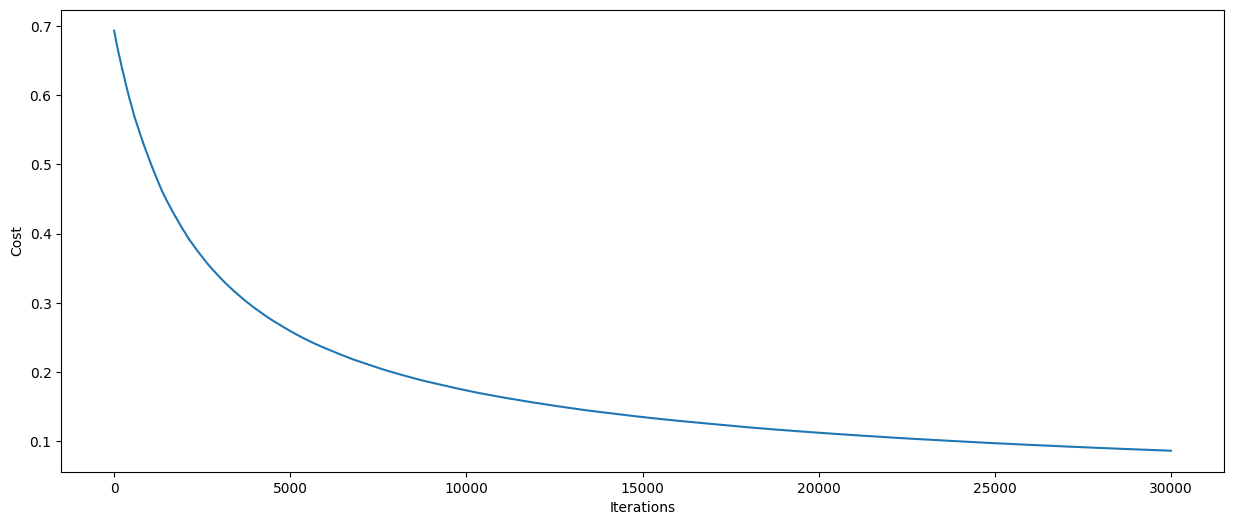

In [ ]:
W = np.zeros(X.shape[1])
b = 0

history = main_sgd(X, y, W, b, epochs=30, lr=1e-3)

plt.figure(figsize=(15,6))
plt.plot(np.arange(len(history['cost'])),
         history['cost'])
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

**<font color="blue">2.b. Display the final accuracy score.**

In [ ]:
y_pred = predict(X, history["weights"][-1][-1], history["bias"][-1])
y_pred = list(map(lambda x: 1 if x>0.5 else 0, y_pred))
print(f"Final accuracy: {accuracy_score(y, y_pred):.2%}")

Final accuracy: 99.40%


# SGD with Momentum

To modify a Stochastic Gradient Descent into an SGD with momentum, you need to introduce a momentum term into the update rule.

In standard SGD, the parameters are updated solely based on the current gradient. However, in SGD with momentum you update the parameters by combining the current gradient and the previous update. Specifically, you introduce a new variable which is a weighted sum of the current gradient and the previous ones. The "weight" of that sum is controlled by the momentum term usually denoted as $\beta$.<br><br>

<font size="+1"><center>$\begin{align*}
z_n &= \beta z_{n-1} - \eta \frac{\partial L(\theta_n)}{\partial \theta_n} \\
\theta_{n+1} &= \theta_n + z_n
\end{align*}$</center><br>

The momentum term takes a value between 0 and 1 and controls how much of the previous update is retained. A higher momentum value results in keeping more of the previous update, which can help in accelerating the convergence and reducing oscillations.

**<font color="blue"> 1. Create a new version of the update_weights function by adding the momentum.**

*Tips: You can use a dictionary to save the previous gradients.*

In [ ]:
def update_weights_momentum(X, y, y_pred, z_n, W, b, lr, beta):

    d_w = np.dot(X.T, (y_pred - y)) / X.shape[0]
    d_b = np.mean(y_pred - y)

    z_n["W"] = beta * z_n["W"] - lr * d_w
    z_n["b"] = beta * z_n["b"] - lr * d_b

    W += z_n["W"]
    b += z_n["b"]

    return W, b, z_n

**<font color="blue"> 2.a. Create a new version of the main_sgd function that implements the momentum.
<br>2.b. Display the graph of the errors relative to the iterations.**

*Tips: You just have to initialize the previous gradients to 0.*

In [ ]:
def main_sgd_momentum(X, y, W, b, lr, beta=0.9, eps = 1e-5, epochs=20):
    weight_history = [W]
    bias_history = [b]
    cost_history = [np.inf]
    z_n = {"W": np.zeros(W.shape),
           "b": 0}

    for epoch in range(1,epochs+1):
        X_shuf, y_shuf = shuffle(X, y)

        for iter in range(len(X)):

            X_iter = X_shuf[iter][np.newaxis, ...]
            y_iter = y_shuf[iter][np.newaxis, ...]

            y_pred = predict(X_iter, W, b)

            W, b, z_n = update_weights_momentum(X_iter, y_iter, y_pred, z_n, W, b, lr, beta)

            weight_history.append([W])
            bias_history.append(b)

            y_pred = predict(X_shuf, W, b)
            cost = cross_entropy(y_shuf, y_pred)
            cost_history.append(cost)

        w_values = " ".join([f"w{i+1}({w:+7.3f})" for i, w in enumerate(W)])
        print(f"epoch : {epoch:+4}     W : {w_values}     bias : {b:+7.4f}     cost : {cost:.5}")

    return {"weights": weight_history, "bias": bias_history, "cost": cost_history}

epoch :   +1     W : w1( +1.990) w2( -0.377)     bias : -0.1681     cost : 0.17344
epoch :   +2     W : w1( +2.678) w2( -0.626)     bias : -0.4245     cost : 0.1121
epoch :   +3     W : w1( +3.103) w2( -0.827)     bias : -0.6207     cost : 0.086062
epoch :   +4     W : w1( +3.418) w2( -0.992)     bias : -0.7678     cost : 0.071279
epoch :   +5     W : w1( +3.667) w2( -1.134)     bias : -0.8887     cost : 0.061661
epoch :   +6     W : w1( +3.880) w2( -1.242)     bias : -0.9902     cost : 0.054904
epoch :   +7     W : w1( +4.064) w2( -1.339)     bias : -1.0756     cost : 0.049853
epoch :   +8     W : w1( +4.228) w2( -1.426)     bias : -1.1459     cost : 0.045924
epoch :   +9     W : w1( +4.370) w2( -1.510)     bias : -1.2107     cost : 0.042779
epoch :  +10     W : w1( +4.505) w2( -1.577)     bias : -1.2653     cost : 0.040202
epoch :  +11     W : w1( +4.629) w2( -1.641)     bias : -1.3155     cost : 0.038035
epoch :  +12     W : w1( +4.742) w2( -1.699)     bias : -1.3601     cost : 0.03

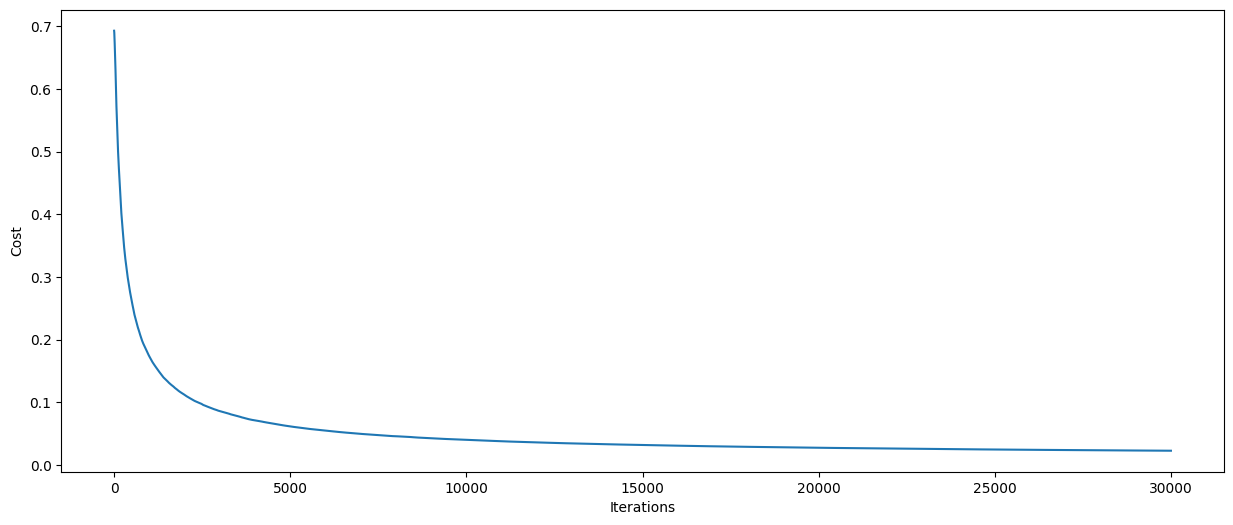

In [ ]:
W = np.zeros(X.shape[1])
b = 0

history = main_sgd_momentum(X, y, W, b, epochs=30, lr=1e-3)

plt.figure(figsize=(15,6))
plt.plot(np.arange(len(history['cost'])),
         history['cost'])
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

**<font color="blue">2.c. Display the final accuracy score.**

In [ ]:
y_pred = predict(X, history["weights"][-1][-1], history["bias"][-1])
y_pred = list(map(lambda x: 1 if x>0.5 else 0, y_pred))
print(f"Final accuracy: {accuracy_score(y, y_pred):.2%}")

Final accuracy: 99.70%
